Data type of TMP column: float64


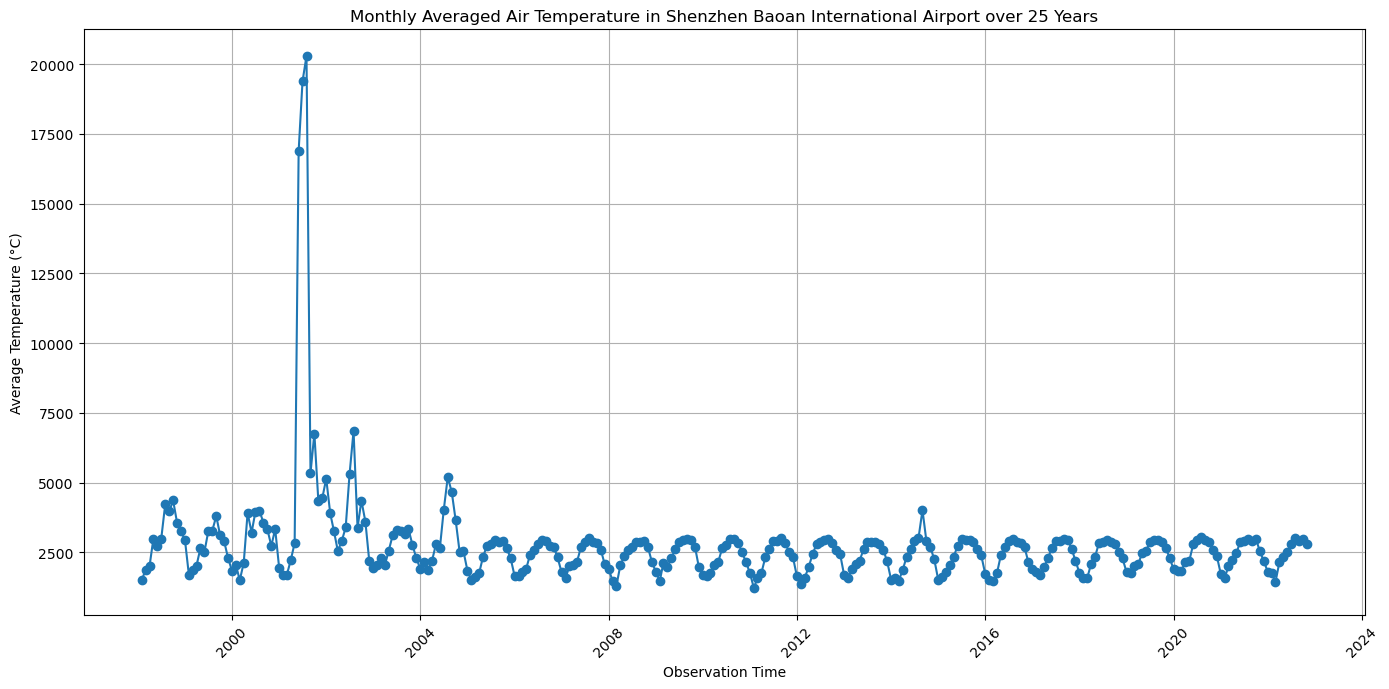

Trend Analysis:
There is no clear trend.


In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Step 1: Load the CSV file
file_path = 'Baoan_Weather_1998_2022.csv'
weather_data = pd.read_csv(file_path, low_memory=False)

# Step 2: Select relevant columns
relevant_columns = ['DATE', 'TMP']
weather_data = weather_data[relevant_columns]

# Step 3: Clean the data
# Define a function to clean the TMP column
def clean_tmp_value(value):
    # Remove non-numeric characters except for '.' and '-'
    cleaned_value = re.sub(r'[^\d.-]', '', value)
    try:
        # Try to convert to float
        return float(cleaned_value)
    except ValueError:
        # If conversion fails, return NaN
        return None

# Apply the cleaning function to the TMP column
weather_data['TMP'] = weather_data['TMP'].apply(clean_tmp_value)

# Drop rows with missing values
weather_data.dropna(inplace=True)

# Ensure TMP column is float
weather_data['TMP'] = weather_data['TMP'].astype(float)

# Verify the data type of TMP column
print(f"Data type of TMP column: {weather_data['TMP'].dtype}")

# Convert DATE to datetime using ISO8601 format
weather_data['datetime'] = pd.to_datetime(weather_data['DATE'], format='ISO8601')

# Set datetime as the index
weather_data.set_index('datetime', inplace=True)

# Step 4: Calculate monthly average temperature using agg method
monthly_avg_temp = weather_data.resample('ME').agg({'TMP': 'mean'})

# Step 5: Plot the monthly averaged air temperature against observation time
plt.figure(figsize=(14, 7))
plt.plot(monthly_avg_temp.index, monthly_avg_temp['TMP'], marker='o')
plt.title('Monthly Averaged Air Temperature in Shenzhen Baoan International Airport over 25 Years')
plt.xlabel('Observation Time')
plt.ylabel('Average Temperature (°C)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Check for trends
print("Trend Analysis:")
if monthly_avg_temp['TMP'].is_monotonic_increasing:
    print("There is a clear increasing trend.")
elif monthly_avg_temp['TMP'].is_monotonic_decreasing:
    print("There is a clear decreasing trend.")
else:
    print("There is no clear trend.")